In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h1>1. Setting Feature</h1>

In [33]:
try:
    df = pd.read_csv(r'..\Project\books.csv')
except pd.errors.ParserError as e:
    print(f"Error: {e}")

# Error on the data so we went to correct the data in the csv file


Error: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13



- Error: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 4704, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 5879, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 8981, saw 13

Those error are all because some author fields contains ",", so it kill the shape of the csv file.
the new corrected file is located in "..\DataBase\books.csv"


In [34]:
df = pd.read_csv(r'..\DataBase\books.csv')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [35]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


it would be logical that books with low amount of rating, would be less reliable, so we need to choose at what amount of rating we choose to drop a line because of non-reliability. We can already imagine that books with amount of rating equal to 0 will not be kept. (this will be find in recap_db_feature.py)

In [36]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

ZERO NULL VALUE

C:\Users\ndeblecker\AppData\Local\Temp\ipykernel_15648\3869558239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.average_rating)


<Axes: xlabel='average_rating', ylabel='Density'>

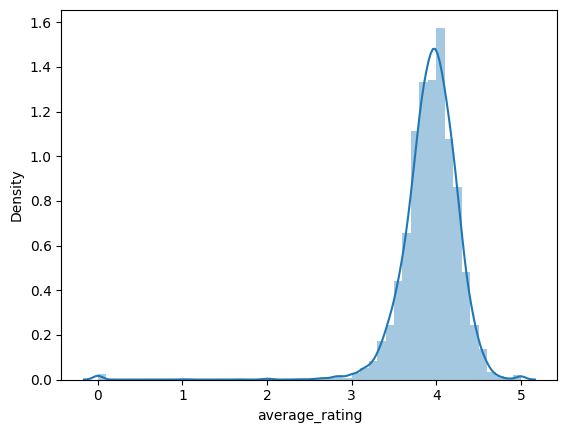

In [37]:
sns.distplot(df.average_rating)

There is all the value grouped between 3 and 5, but some value is close to zero

<h2>1.1 BookID</h2> 

there is no interest to keep bookID, being a fictif number

<h2>1.2 Title</h2>

- we can try to look if the number of word and the lenght of the title have an impact
- or drop

<h2>1.3 Authors</h2>

- We will drop this columns, there is too many different author for having the possibility to Vectorize

<h2>1.4 Average_rating</h2>

- will be the target feature to evaluate, stay in this shape

<h2>1.5 Isbn</h2>

- this is only an identifier so no value as raw data, but can possibly help us to improve database

<h2>1.6 Isbn13</h2>

- - this is only an identifier so no value as raw data, but can possibly help us to improve database and contain language key that can maybe be used

<h2>1.7 Language_code</h2>

- Can try the simple vectorization, vectorization with generalisation of language_code, or drop

<h2>1.8 Num_pages</h2>

- we can keep it and drop it, and see which result is the best

<h2>1.9 Ratings_count</h2> 

In [38]:
round(df['average_rating']).value_counts()

average_rating
4.0    10204
3.0      696
5.0      189
0.0       26
2.0       10
1.0        2
Name: count, dtype: int64

Let's drop all books with rating count equal to 0:

In [24]:
new_df = df[df["ratings_count"] > 0]
round(new_df['average_rating']).value_counts()

average_rating
4.0    10161
3.0      689
5.0      185
2.0        9
1.0        2
Name: count, dtype: int64

In [42]:
new_df = df[df["ratings_count"] > 50]
round(new_df['average_rating']).value_counts()

average_rating
4.0    8630
3.0     476
5.0     106
2.0       1
Name: count, dtype: int64

We can see that the grades close to 0 don't have a lot of rating in general and desapear when we filter by ratings_count > 50, with could go futher but we can see that when we filter by ratings_count > 100, there is still the same proportion of rating for each grade, so we could try to filter ratings_count > 0 and ratings_count > 50

In [43]:
new_df = df[df["ratings_count"] > 100]
round(new_df['average_rating']).value_counts()

average_rating
4.0    7878
3.0     420
5.0      94
2.0       1
Name: count, dtype: int64

<h2>1.10 text_reviews_count</h2>

- Let's keep it

<h2>1.11 publication_date</h2>

- we can try multiple shape of date:
    - keeping only the day
    - keeping only the month
    - keeping only the year
    - keeping the all date
    - keeping the age of the book
    - or finally if there is no influence: drop this column

<h2>1.12 publisher</h2>

- there is too many different publisher for trying to vectorize or keeping it, so drop